In [11]:
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot
from dataprep.eda import plot_correlation


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv', error_bad_lines=False)


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y%m%d')

In [5]:
df.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Aruba,ABW,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Aruba,ABW,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Aruba,ABW,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Aruba,ABW,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [72]:
plot(df)

In [84]:
plot(df, 'H2_Testing policy', 'H3_Contact tracing' )

In [48]:
plot(df,  'ConfirmedCases')

In [46]:
plot(df,  'ConfirmedCases', 'CountryName')

In [71]:
plot(df, 'ConfirmedCases', 'ConfirmedDeaths', sample_size = 30000, yscale = 'linear')

In [63]:
plot(df, 'ConfirmedDeaths', 'StringencyIndex', sample_size = 10000, yscale = 'linear', value_range=(0,300000))

In [14]:
plot_correlation(df, 'ConfirmedCases','ConfirmedDeaths')

In [64]:
plot_correlation(df, 'ConfirmedDeaths', 'StringencyIndex')

In [32]:
C1_School_closing = pd.DataFrame()
C1_School_closing['Date'] = pd.Series(pd.to_datetime(df[df['CountryName'] == 'United States']['Date'], format = '%Y%m%d'))
C1_School_closing.reset_index(inplace = True, drop = True)

C2_Workplace_closing = pd.DataFrame()
C3_Cancel_public_events = pd.DataFrame()
C4_Restrictions_on_gatherings = pd.DataFrame()
C5_Close_public_transport = pd.DataFrame()
C6_Stay_at_home_requirements = pd.DataFrame()
C7_Restrictions_on_internal_movement = pd.DataFrame()
C8_International_travel_controls = pd.DataFrame()
E1_Income_support = pd.DataFrame()
E2_Debt_contract_relief = pd.DataFrame()
E3_Fiscal_measures= pd.DataFrame()
E4_International_support= pd.DataFrame()
H1_Public_information_campaigns= pd.DataFrame()
H2_Testing_policy= pd.DataFrame()
H3_Contact_tracing= pd.DataFrame()
H4_Emergency_investment_in_healthcare= pd.DataFrame()
H5_Investment_in_vaccines = pd.DataFrame()
ConfirmedCases = pd.DataFrame()
ConfirmedDeaths = pd.DataFrame()
StringencyIndex = pd.DataFrame()

In [34]:
country_names = df['CountryName'].unique()
for country in country_names:
    country_data = pd.DataFrame()
    country_data = df[df['CountryName'] == country]
    C1_School_closing[country] = pd.Series(country_data['C1_School closing'].values)
    #C1_School_closing.reset_index(inplace = True,drop = True)
    C2_Workplace_closing[country] = pd.Series(country_data['C2_Workplace closing'].values)
    C3_Cancel_public_events[country] = pd.Series(country_data['C3_Cancel public events'].values)
    C4_Restrictions_on_gatherings[country] = pd.Series(country_data['C4_Restrictions on gatherings'].values)
    C5_Close_public_transport[country] = pd.Series(country_data['C5_Close public transport'].values)
    C6_Stay_at_home_requirements[country] = pd.Series(country_data['C6_Stay at home requirements'].values)
    C7_Restrictions_on_internal_movement[country] = pd.Series(country_data['C7_Restrictions on internal movement'].values)
    C8_International_travel_controls[country] = pd.Series(country_data['C8_International travel controls'].values)
    E1_Income_support[country] = pd.Series(country_data['E1_Income support'].values)
    E2_Debt_contract_relief[country] = pd.Series(country_data['E2_Debt/contract relief'].values)
    E3_Fiscal_measures[country] = pd.Series(country_data['E3_Fiscal measures'].values)
    E4_International_support[country] = pd.Series(country_data['E4_International support'].values)
    H1_Public_information_campaigns[country] = pd.Series(country_data['H1_Public information campaigns'].values)
    H2_Testing_policy[country] = pd.Series(country_data['H2_Testing policy'].values)
    H3_Contact_tracing[country] = pd.Series(country_data['H3_Contact tracing'].values)
    H4_Emergency_investment_in_healthcare[country] = pd.Series(country_data['H4_Emergency investment in healthcare'].values)
    H5_Investment_in_vaccines[country] = pd.Series(country_data['H5_Investment in vaccines'].values)
    ConfirmedCases[country] = pd.Series(country_data['ConfirmedCases'].values)
    ConfirmedDeaths[country] = pd.Series(country_data['ConfirmedDeaths'].values)
    StringencyIndex[country] = pd.Series(country_data['StringencyIndex'].values)
        


In [67]:
plot(ConfirmedDeaths, 'Russia', 'Italy')

In [82]:
plot(ConfirmedDeaths, 'China')

In [77]:
plot_correlation(ConfirmedDeaths, 'United Kingdom', 'United States')

In [81]:
plot_correlation(ConfirmedDeaths, 'Russia', 'United States')

In [43]:
plot(StringencyIndex)

No handles with labels found to put in legend.


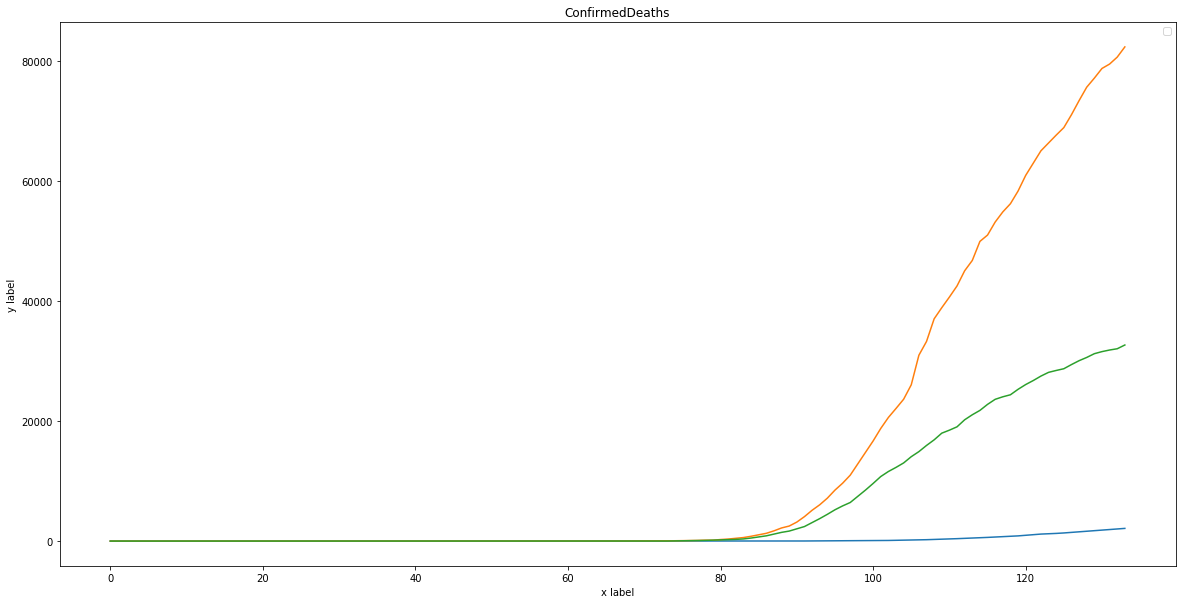

In [89]:

plt.figure(figsize=(20,10))
plt.plot(ConfirmedDeaths['Russia'], label = )
plt.plot(ConfirmedDeaths['United States'])
plt.plot(ConfirmedDeaths['United Kingdom'])
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("ConfirmedDeaths")
plt.legend()
plt.show()